In [ ]:
!pip install pathway bokeh --quiet

In [ ]:
!pip install geopy --quiet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
import pathway as pw
import bokeh.plotting
import panel as pn
from datetime import datetime
from bokeh.models import ColumnDataSource
from google.colab import files
from sklearn.neighbors import BallTree
from bokeh.io import curdoc
from bokeh.models import ColumnDataSource, Legend, CheckboxGroup
from bokeh.layouts import column, row
from bokeh.io import curdoc
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import layout
from time import sleep
from IPython.display import clear_output, display

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset (2).csv


In [ ]:
df = pd.read_csv('dataset.csv')
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [ ]:
#adding a price column, initailly the price is $10
df['price']=10
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,price
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,10
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,10
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,10
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,10
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00,10
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00,10
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00,10
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00,10


In [ ]:
#preprocessing of the data
# Combine date and time into a single timestamp column
df['Timestamp'] = pd.to_datetime(
    df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
    format='%d-%m-%Y %H:%M:%S'
)

# Sort by time
df = df.sort_values('Timestamp').reset_index(drop=True)

In [ ]:
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,price,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00


In [ ]:
# Haversine formula in meters
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # Earth radius in meters
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Compute proximity-based features with distance > 0 filtering
def compute_proximity_features_fast(df, radius_m=500):
    latitudes = df['Latitude'].values
    longitudes = df['Longitude'].values
    n = len(df)

    nearest_distances = np.zeros(n)
    competitor_counts = np.zeros(n)

    for i in range(n):
        # Vectorized distance calculation to all others
        dists = haversine_distance(latitudes[i], longitudes[i], latitudes, longitudes)

        # Exclude self and exact duplicates (distance == 0)
        mask = dists > 0
        filtered_dists = dists[mask]

        # Nearest competitor distance
        if len(filtered_dists) > 0:
            nearest_distances[i] = filtered_dists.min()
        else:
            nearest_distances[i] = np.nan

        # Count competitors within radius (excluding exact duplicates)
        competitor_counts[i] = np.sum((dists < radius_m) & (dists > 0))

    df['nearest_distances'] = nearest_distances
    df['competitor_counts'] = competitor_counts.astype(int)
    return df

In [ ]:
df = compute_proximity_features_fast(df)
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,price,Timestamp,nearest_distances,competitor_counts
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00,5.672431e+00,1312
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00,4.633054e+00,1312
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00,1.560437e+06,0
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00,4.633054e+00,1312
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00,6.185447e+02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00,5.992908e+02,0
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00,5.672431e+00,1312
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00,5.672431e+00,1312
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00,2.176882e+00,6560


In [ ]:
# Saving the selected columns to a CSV file for streaming or downstream processing
df[["Timestamp", "Occupancy", "Capacity","price", "nearest_distances","competitor_counts"]].to_csv("parking_stream.csv", index=False)

In [ ]:

files.download("parking_stream.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Define the schema for the streaming data using Pathway
# This schema specifies the expected structure of each data row in the stream
class ParkingSchema(pw.Schema):
    Timestamp: str
    Occupancy: int
    Capacity: int
    nearest_distances:int
    competitor_counts:int


In [ ]:
# Load the data as a simulated stream using Pathway's replay_csv function
# This replays the CSV data at a controlled input rate to mimic real-time streaming
# input_rate=1000 means approximately 1000 rows per second will be ingested into the stream.

data = pw.demo.replay_csv("parking_stream.csv", schema=ParkingSchema, input_rate=1000)


In [ ]:
# Define the datetime format to parse the 'Timestamp' column
fmt = "%Y-%m-%d %H:%M:%S"

# Add new columns to the data stream:
# - 't' contains the parsed full datetime
# - 'day' extracts the date part and resets the time to midnight (useful for day-level aggregations)
data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),
    day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
)


In [ ]:
# Define a daily tumbling window over the data stream using Pathway
# This block performs temporal aggregation and computes a dynamic price for each day


delta_window = (
    data_with_time.windowby(
        pw.this.t,  # Event time column to use for windowing (parsed datetime)
        instance=pw.this.day,  # Logical partitioning key: one instance per calendar day
        window=pw.temporal.tumbling(datetime.timedelta(days=1)),  # Fixed-size daily window
        behavior=pw.temporal.exactly_once_behavior()  # Guarantees exactly-once processing semantics
    )
    .reduce(
        t=pw.this._pw_window_end,                        # Assign the end timestamp of each window
        occ_max=pw.reducers.max(pw.this.Occupancy),      # Highest occupancy observed in the window
        occ_min=pw.reducers.min(pw.this.Occupancy),      # Lowest occupancy observed in the window
        cap=pw.reducers.max(pw.this.Capacity),           # Maximum capacity observed (typically constant per spot)
    )
    .with_columns(
        # Apply your model: Price = 10 + α * (cap / occ_min)
        price=10 + 5 * (pw.this.cap / (pw.this.occ_min + 0.1))  # +0.1 to avoid divide-by-zero
        )
)




In [ ]:
pw.io.csv.write(delta_window, "output_prices1.csv")
pw.run()

Output()

/usr/local/lib/python3.11/dist-packages/beartype/_util/hint/pep/utilpeptest.py:311: BeartypeDecorHintPep585DeprecationWarning: PEP 484 type hint typing.Iterable[pathway.internals.expression.ColumnReference] deprecated by PEP 585. This hint is scheduled for removal in the first Python version released after October 5th, 2025. To resolve this, import this hint from "beartype.typing" rather than "typing". For further commentary and alternatives, see also:
    https://beartype.readthedocs.io/en/latest/api_roar/#pep-585-deprecations
  warn(


In [ ]:
#downloading the output file from model1
files.download("output_prices1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                               t  occ_max  occ_min   cap       price  \
0  2016-10-05T00:00:00.000000000     3251       61  3883  327.757774   
1  2016-10-06T00:00:00.000000000     3213       54  3883  368.872458   
2  2016-10-07T00:00:00.000000000     3137       58  3883  344.165232   
3  2016-10-08T00:00:00.000000000     2676       58  3883  344.165232   
4  2016-10-09T00:00:00.000000000     1600       52  3883  382.648752   

            time  diff  
0  1751816120044     1  
1  1751816120374     1  
2  1751816120700     1  
3  1751816121030     1  
4  1751816121368     1  


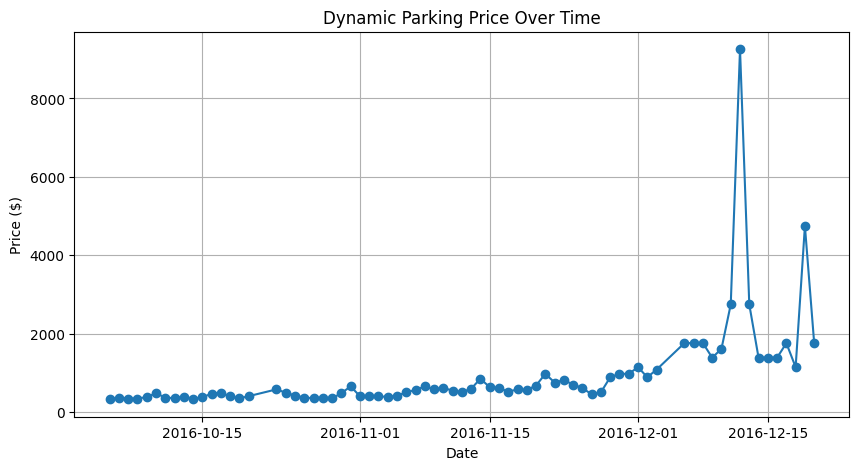

In [ ]:
#visualization of model1, time vs pice of parking lot
df_price = pd.read_csv("output_prices1.csv")
print(df_price.head())


df_price['t'] = pd.to_datetime(df_price['t'])

plt.figure(figsize=(10, 5))
plt.plot(df_price['t'], df_price['price'], marker='o')
plt.title('Dynamic Parking Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


In [ ]:
#model-2, adding more required feature to the dataset
# Simulate queue length between 0 and 10
df['QueueLength'] = np.random.randint(0, 11, size=len(df))

# Simulate traffic level: 0 (low), 1 (medium), 2 (high)
df['TrafficLevel'] = np.random.choice([0, 1, 2], size=len(df))

# Simulate special days (5% of rows)
df['IsSpecialDay'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])

# Simulate vehicle type weights: 1.0 (small), 1.5 (SUV), 2.0 (EV)
df['VehicleTypeWeight'] = np.random.choice([1.0, 1.5, 2.0], size=len(df))


In [ ]:
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,price,Timestamp,nearest_distances,competitor_counts,TrafficLevel,VehicleTypeWeight
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,10,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00,5.672431e+00,1312,2,1.5
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,4,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00,4.633054e+00,1312,1,1.5
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,8,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00,1.560437e+06,0,1,2.0
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,4,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00,4.633054e+00,1312,1,2.0
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,0,0,04-10-2016,07:59:00,10,2016-10-04 07:59:00,6.185447e+02,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,6,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00,5.992908e+02,0,1,1.5
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,6,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00,5.672431e+00,1312,1,2.0
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,7,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00,5.672431e+00,1312,1,1.0
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,1,0,19-12-2016,16:30:00,10,2016-12-19 16:30:00,2.176882e+00,6560,0,1.5


In [ ]:
df[["Latitude", "Longitude",
    "Timestamp", "Occupancy", "Capacity","nearest_distances","competitor_counts",
    "QueueLength", "TrafficLevel", "IsSpecialDay", "VehicleTypeWeight"

]].to_csv("parking_stream_model2.csv", index=False)

In [ ]:
files.download("parking_stream_model2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#again setting up the pathway schema
class ParkingSchema(pw.Schema):
    Timestamp: str
    Occupancy: int
    Capacity: int
    nearest_distances:int
    competitor_counts:int
    QueueLength: int
    TrafficLevel: int
    IsSpecialDay: int
    VehicleTypeWeight: float


In [ ]:
data = pw.demo.replay_csv("parking_stream_model2.csv", schema=ParkingSchema, input_rate=1000)

In [ ]:
fmt = "%Y-%m-%d %H:%M:%S"
data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),
    day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
)

In [ ]:
delta_window = (
    data_with_time.windowby(
        pw.this.t,
        instance=pw.this.day,
        window=pw.temporal.tumbling(datetime.timedelta(days=1)),
        behavior=pw.temporal.exactly_once_behavior()
    )
    .reduce(
        t = pw.this._pw_window_end,
        occ_sum = pw.reducers.sum(pw.this.Occupancy),
        cap_sum = pw.reducers.sum(pw.this.Capacity),
        queue_sum = pw.reducers.sum(pw.this.QueueLength),
        queue_count = pw.reducers.count(pw.this.QueueLength),
        traffic_sum = pw.reducers.sum(pw.this.TrafficLevel),
        traffic_count = pw.reducers.count(pw.this.TrafficLevel),
        special_sum = pw.reducers.sum(pw.this.IsSpecialDay),
        special_count = pw.reducers.count(pw.this.IsSpecialDay),
        vehicle_sum = pw.reducers.sum(pw.this.VehicleTypeWeight),
        vehicle_count = pw.reducers.count(pw.this.VehicleTypeWeight)
    )
    .with_columns(
        occupancy_rate = pw.this.occ_sum / (pw.this.cap_sum + 0.1),
        avg_queue_length = pw.this.queue_sum / (pw.this.queue_count + 0.1),
        avg_traffic_level = pw.this.traffic_sum / (pw.this.traffic_count + 0.1),
        avg_is_special_day = pw.this.special_sum / (pw.this.special_count + 0.1),
        avg_vehicle_type_weight = pw.this.vehicle_sum / (pw.this.vehicle_count + 0.1)
    )
    .with_columns(
        demand = (
            1.0 * pw.this.occupancy_rate +
            0.5 * pw.this.avg_queue_length -
            0.7 * pw.this.avg_traffic_level +
            1.5 * pw.this.avg_is_special_day +
            0.8 * pw.this.avg_vehicle_type_weight
        )
    )
    .with_columns(
        # Simplified price calculation
        price = 10 + 0.5 * pw.this.demand # Simple price based on demand
    )
)

In [ ]:
pw.io.csv.write(
    delta_window.select(
        pw.this.t,
        pw.this.occupancy_rate,
        pw.this.avg_queue_length,
        pw.this.avg_traffic_level,
        pw.this.avg_is_special_day,
        pw.this.avg_vehicle_type_weight,
        pw.this.demand,
        pw.this.price
    ),
    "output_prices2.csv"
)
pw.run()


Output()

In [ ]:
#saving the output for model2
files.download("output_prices2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

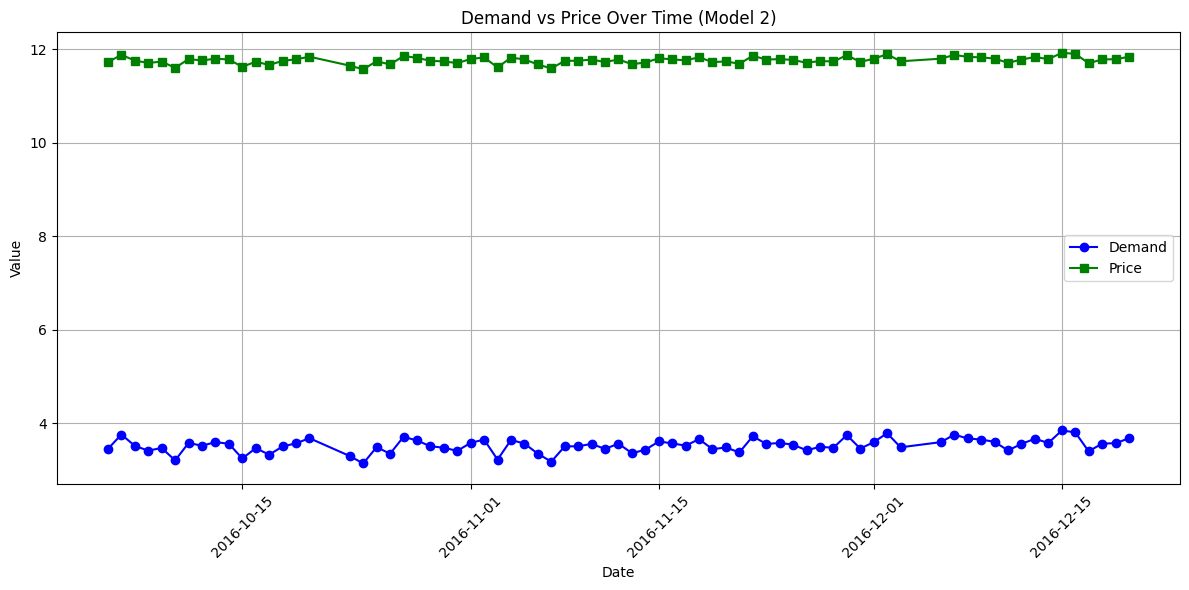

In [ ]:
# Plotting demand vs price over time
# Load the file (if not already loaded)
df = pd.read_csv("output_prices2.csv")

# Convert 't' column to datetime
df['t'] = pd.to_datetime(df['t'])

# Plot Demand vs Price
plt.figure(figsize=(12, 6))
plt.plot(df['t'], df['demand'], label='Demand', color='blue', marker='o')
plt.plot(df['t'], df['price'], label='Price', color='green', marker='s')
plt.title("Demand vs Price Over Time (Model 2)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


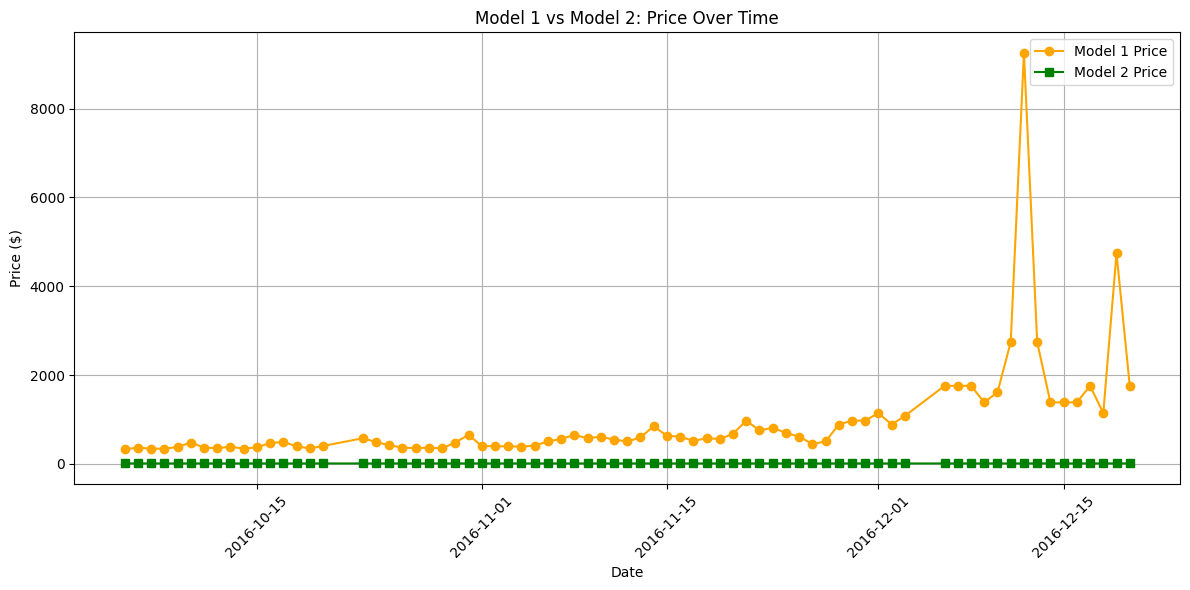

In [ ]:
#Comparing with Model 1 outputs
# Load both model outputs
model1 = pd.read_csv("output_prices1.csv")
model2 = pd.read_csv("output_prices2.csv")

# Convert 't' to datetime
model1['t'] = pd.to_datetime(model1['t'])
model2['t'] = pd.to_datetime(model2['t'])

# Merge both on 't' (date)
merged = pd.merge(model1[['t', 'price']], model2[['t', 'price']], on='t', suffixes=('_model1', '_model2'))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged['t'], merged['price_model1'], label='Model 1 Price', color='orange', marker='o')
plt.plot(merged['t'], merged['price_model2'], label='Model 2 Price', color='green', marker='s')
plt.title("Model 1 vs Model 2: Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df


,t,occupancy_rate,avg_queue_length,avg_traffic_level,avg_is_special_day,avg_vehicle_type_weight,demand,price,time,diff
0,2016-10-05,0.514877,4.724316,0.967870,0.023800,1.523205,3.453790,11.726895,1751816171342,1
1,2016-10-06,0.519154,5.319318,0.880603,0.023800,1.453788,3.761121,11.880561,1751816171672,1
2,2016-10-07,0.500952,4.918683,0.999603,0.039667,1.497422,3.518008,11.759004,1751816172020,1
3,2016-10-08,0.454736,4.835383,1.047203,0.039667,1.521222,3.415862,11.707931,1751816172358,1
4,2016-10-09,0.325096,5.156684,0.995637,0.051567,1.487505,3.473847,11.736923,1751816172704,1
...,...,...,...,...,...,...,...,...,...,...
68,2016-12-16,0.533648,5.291551,0.995637,0.071400,1.523205,3.808142,11.904071,1751816195014,1
69,2016-12-17,0.477175,4.767949,1.035303,0.043633,1.499405,3.401411,11.700706,1751816195372,1
70,2016-12-18,0.449131,4.946450,0.912336,0.063467,1.483538,3.565752,11.782876,1751816195732,1
71,2016-12-19,0.398241,5.120984,0.940103,0.051567,1.497422,3.575948,11.787974,1751816196114,1


In [ ]:
#model3, preprocessing of data
df_model2 = pd.read_csv("output_prices2.csv")
df_orig = pd.read_csv("parking_stream_model2.csv")

# Convert timestamp columns
df_model2["t"] = pd.to_datetime(df_model2["t"])
df_orig["Timestamp"] = pd.to_datetime(df_orig["Timestamp"])

# Merge Model 2 prices with original data
df = pd.merge_asof(
    df_orig.sort_values("Timestamp"),
    df_model2.sort_values("t"),
    left_on="Timestamp",
    right_on="t",
    direction="nearest"
)

# Ensure Latitude and Longitude are float types
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

In [ ]:
def compute_competitor_price(df, radius_m=500):
    # Step 1: Ensure numeric values
    df["Latitude"] = pd.to_numeric(df["Latitude"], errors='coerce')
    df["Longitude"] = pd.to_numeric(df["Longitude"], errors='coerce')
    df["price"] = pd.to_numeric(df["price"], errors='coerce')
    df = df.dropna(subset=["Latitude", "Longitude", "price"]).reset_index(drop=True)

    # Step 2: Convert to radians for Haversine
    coords_rad = np.radians(df[["Latitude", "Longitude"]].values)
    tree = BallTree(coords_rad, metric='haversine')
    radius_rad = radius_m / 6371000.0  # Convert meters to radians

    mean_prices = []
    for i, coord in enumerate(coords_rad):
        indices = tree.query_radius([coord], r=radius_rad)[0]
        indices = indices[indices != i]  # Exclude self

        if len(indices) > 0:
            mean_price = df.iloc[indices]["price"].mean()
        else:
            mean_price = df.iloc[i]["price"]

        mean_prices.append(mean_price)

    df["mean_competitor_price"] = mean_prices
    return df


In [ ]:
df = compute_competitor_price(df)
df

,Latitude,Longitude,Timestamp,Occupancy,Capacity,nearest_distances,competitor_counts,QueueLength,TrafficLevel,IsSpecialDay,...,occupancy_rate,avg_queue_length,avg_traffic_level,avg_is_special_day,avg_vehicle_type_weight,demand,price,time,diff,mean_competitor_price
0,26.144536,91.736172,2016-10-04 07:59:00,61,577,5.672431,1312,10,2,0,...,0.514877,4.724316,0.967870,0.023800,1.523205,3.453790,11.726895,1751816171342,1,11.761855
1,26.147500,91.727978,2016-10-04 07:59:00,588,3103,2.176882,6560,7,1,0,...,0.514877,4.724316,0.967870,0.023800,1.523205,3.453790,11.726895,1751816171342,1,11.761846
2,26.147491,91.727997,2016-10-04 07:59:00,547,2937,1.272247,6560,1,2,0,...,0.514877,4.724316,0.967870,0.023800,1.523205,3.453790,11.726895,1751816171342,1,11.761846
3,26.147499,91.728005,2016-10-04 07:59:00,1081,3883,1.272247,6560,3,0,1,...,0.514877,4.724316,0.967870,0.023800,1.523205,3.453790,11.726895,1751816171342,1,11.761846
4,26.147541,91.727970,2016-10-04 07:59:00,195,2803,2.638066,6560,4,2,0,...,0.514877,4.724316,0.967870,0.023800,1.523205,3.453790,11.726895,1751816171342,1,11.761846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,26.147549,91.727995,2016-12-19 16:30:00,806,1322,2.638066,6560,0,2,0,...,0.574217,5.005950,0.959937,0.067434,1.465688,3.678938,11.839469,18446744073709551614,1,11.761832
18364,26.137958,91.740994,2016-12-19 16:30:00,540,690,869.991594,0,6,2,0,...,0.574217,5.005950,0.959937,0.067434,1.465688,3.678938,11.839469,18446744073709551614,1,11.761622
18365,26.147500,91.727978,2016-12-19 16:30:00,1671,3103,2.176882,6560,1,0,0,...,0.574217,5.005950,0.959937,0.067434,1.465688,3.678938,11.839469,18446744073709551614,1,11.761832
18366,26.147473,91.728049,2016-12-19 16:30:00,1345,2009,5.305847,6560,5,1,0,...,0.574217,5.005950,0.959937,0.067434,1.465688,3.678938,11.839469,18446744073709551614,1,11.761832


In [ ]:
# Save processed file
final_cols = ["Timestamp", "Occupancy", "Capacity", "price", "mean_competitor_price"]
df[final_cols].to_csv("model3_input_with_competitor_price.csv", index=False)

In [ ]:
class ParkingSchema3(pw.Schema):
    Timestamp: str
    Occupancy: int
    Capacity: int
    price: float
    mean_competitor_price: float

# Load the data as a stream
data = pw.demo.replay_csv("model3_input_with_competitor_price.csv", schema=ParkingSchema3, input_rate=1000)

# Parse datetime
date_fmt = "%Y-%m-%d %H:%M:%S"
data = data.with_columns(
    t = data.Timestamp.dt.strptime(date_fmt),
    day = data.Timestamp.dt.strptime(date_fmt).dt.strftime("%Y-%m-%dT00:00:00")
)

# Windowing and pricing logic
delta_window = (
    data.windowby(
        pw.this.t,
        instance=pw.this.day,
        window=pw.temporal.tumbling(datetime.timedelta(days=1)),
        behavior=pw.temporal.exactly_once_behavior()
    )
    .reduce(
        t = pw.this._pw_window_end,
        price_sum = pw.reducers.sum(pw.this.price), # Corrected from price_x
        price_count = pw.reducers.count(pw.this.price), # Corrected from price_x
        competitor_sum = pw.reducers.sum(pw.this.mean_competitor_price),
        competitor_count = pw.reducers.count(pw.this.mean_competitor_price),
        occ_sum = pw.reducers.sum(pw.this.Occupancy),
        cap_sum = pw.reducers.sum(pw.this.Capacity)
    )
    .with_columns(
        price = pw.this.price_sum / (pw.this.price_count + 0.1),
        competitor_price = pw.this.competitor_sum / (pw.this.competitor_count + 0.1),
        is_full = pw.this.occ_sum >= pw.this.cap_sum
    )
    .with_columns(
        adjusted_price = pw.if_else(
            pw.this.is_full & (pw.this.competitor_price < pw.this.price),
            pw.this.price * 0.9,
            pw.if_else(
                pw.this.competitor_price > pw.this.price * 1.1,
                pw.this.price * 1.1,
                pw.this.price
            )
        )
    )
)

In [ ]:
# Select output columns for model 3
output_prices3 = delta_window.select(
    pw.this.t,
    pw.this.price,
    pw.this.competitor_price,
    pw.this.adjusted_price,
    pw.this.is_full
)

# Write to CSV
pw.io.csv.write(
    output_prices3,
    "output_prices3.csv"
)

# Run the Pathway pipeline
pw.run()


Output()

In [ ]:
files.download("output_prices3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load CSVs
df1 = pd.read_csv("output_prices1.csv")
df2 = pd.read_csv("output_prices2.csv")
df3 = pd.read_csv("output_prices3.csv")

# Convert timestamp to datetime
df1["t"] = pd.to_datetime(df1["t"])
df2["t"] = pd.to_datetime(df2["t"])
df3["t"] = pd.to_datetime(df3["t"])

# Plot
p = figure(title="Dynamic Parking Pricing: Model Comparison", x_axis_type='datetime', width=950, height=450)

# Add lines
l1 = p.line(df1["t"], df1["price"], color="blue", line_width=2, legend_label="Model 1 - Rule-Based")
l2 = p.line(df2["t"], df2["price"], color="green", line_width=2, line_dash="dashed", legend_label="Model 2 - Demand Function")
l3 = p.line(df3["t"], df3["adjusted_price"], color="red", line_width=2, line_dash="dotdash", legend_label="Model 3 - Competition-Aware")

# Labels and legend
p.xaxis.axis_label = "Timestamp"
p.yaxis.axis_label = "Price (₹)"
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.title.text_font_size = "16pt"

show(p)

In [ ]:
#Model 3: Real-Time Pricing Simulation with Bokeh
output_notebook()

# Load Model 3 output
df = pd.read_csv("output_prices3.csv")
df["t"] = pd.to_datetime(df["t"])
df = df.sort_values("t")

# Create data source with empty initial data
source = ColumnDataSource(data=dict(t=[], price=[], adjusted_price=[], competitor_price=[]))

# Set up figure
p = figure(
    title="Simulated Real-Time Pricing - Model 3",
    x_axis_type="datetime",
    width=900, height=450
)
p.line("t", "price", source=source, line_width=2, color="blue", legend_label="Base Price")
p.line("t", "adjusted_price", source=source, line_width=2, color="green", line_dash="dashed", legend_label="Adjusted Price")
p.line("t", "competitor_price", source=source, line_width=2, color="red", line_dash="dotdash", legend_label="Competitor Price")

p.legend.location = "top_left"
p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Price (₹)"

# Display plot
handle = show(p, notebook_handle=True)

# Simulate real-time by adding one row at a time
for i in range(len(df)):
    new_data = {
        't': [df.iloc[i]["t"]],
        'price': [df.iloc[i]["price"]],
        'adjusted_price': [df.iloc[i]["adjusted_price"]],
        'competitor_price': [df.iloc[i]["competitor_price"]]
    }
    source.stream(new_data, rollover=100)
    show(p, notebook_handle=True)
    sleep(0.3)  # Pause to simulate streaming
